# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

# Load Dataset

In [2]:
path = kagglehub.dataset_download("joymarhew/medical-reccomadation-dataset")

Download dataset from Kaggle and get the path.

In [3]:
data = pd.read_csv(f"{path}/medical data.csv")
data.head(10)

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
0,John Doe,15-05-1980,Male,"Fever, Cough",Viral Infection,Common Cold,"Ibuprofen, Rest"
1,Jane Smith,10-08-1992,Female,"Headache, Fatigue",Stress,Migraine,Sumatriptan
2,Michael Lee,20-02-1975,Male,Shortness of breath,Pollution,Asthma,Albuterol Inhaler
3,Emily Chen,03-11-1988,Female,"Nausea, Vomiting",Food Poisoning,Gastroenteritis,Oral Rehydration
4,Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
5,Sarah Kim,25-03-1972,Female,"Joint Pain, Fatigue",Rheumatoid Arthritis,Arthritis,NSAIDs
6,David Wu,18-09-1995,Male,"Chest Pain, Dizziness",High Blood Pressure,Hypertension,Amlodipine
7,Olivia Tan,08-07-1987,Female,"Itching, Redness",Allergies,Allergic Reaction,Antihistamine
8,Chris Ng,01-12-1983,Male,"Abdominal Pain, Bloating",Poor Diet,Indigestion,Antacids
9,Samantha Liu,30-04-1998,Female,"Fatigue, Sadness",Depression,Major Depressive,Sertraline


Load the dataset and show the 10 first data.

# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         241 non-null    object
 1   DateOfBirth  241 non-null    object
 2   Gender       242 non-null    object
 3   Symptoms     247 non-null    object
 4   Causes       245 non-null    object
 5   Disease      249 non-null    object
 6   Medicine     242 non-null    object
dtypes: object(7)
memory usage: 15.8+ KB


Show information about the data like the column names, non null count, and data type.

In [5]:
data.isnull().sum()

,0
Name,46
DateOfBirth,46
Gender,45
Symptoms,40
Causes,42
Disease,38
Medicine,45


Show num of null data of each column

In [6]:
data[data.isnull().any(axis=1)]

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some null data. After check it rows as row, the data could not be used or normalized so the data will dropped

In [7]:
data = data.dropna()
data.shape

(241, 7)

Dropped the null data and show the data shape.

In [8]:
data.duplicated().sum()

84

There are 84 duplicated data

In [9]:
data[data.duplicated(subset=['Name', 'DateOfBirth'])].sort_values(by=['Name', 'DateOfBirth'])

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
220,Aiden Neo,22-08-1997,Male,"Dizziness, Fatigue",Dehydration,Heat Exhaustion,"Hydration, Rest"
273,Aiden Neo,22-08-1997,Male,"Dizziness, Fatigue",Dehydration,Heat Exhaustion Hydr,"ation, Rest"
236,Aiden Tan,09-09-2002,Male,"Fever, Sore Throat",Viral Infection,Tonsillitis,"Fluids, Rest"
56,Alex Wong,12-06-2001,Male,Sore Throat,Bacterial Infection,Strep Throat,Penicillin
229,Ava Lim,11-07-1993,Female,"Cough, Shortness of breat",h COVID-19 Exposure,COVID-19,"Isolation, Fluids"
...,...,...,...,...,...,...,...
132,Sophie Neo,28-06-1983,Femal,"Anxiety, Palpitations",Stress,Anxiety Disorder,"Therapy, Medication"
150,Sophie Neo,28-06-1983,Femal,"e Anxiety, Palpitations",Stress,Anxiety Disorder,"Therapy, Medication"
257,Sophie Neo,28-06-1984,Female,"Anxiety, Palpitations",Stress,Anxiety Disorder,"Therapy, Medication"
231,Sophie Tan,18-02-1975,Female,"Muscle Pain, Fatigue",Overexertion,Muscle Strain,"Rest, Pain Relievers"


I think it's okay to keep it because it's possible to someone have some diagnosis

## Fix the broken data

There are some broken data, in this case uncompleted words like "Femal", "e Anxiety, Palpitations", "h COVID-19 Exposure", "ation, Rest".

In [10]:
def starts_with_lowercase(row):
    for value in row:
        if isinstance(value, str) and value and value[0].islower():
            return True
    return False

lowercase_rows = data[data.apply(starts_with_lowercase, axis=1)]
lowercase_rows

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine
30,Oscar Neo,02-09-1994,Male,"Abdominal Pain, Bloating O",vereating,Indigestion,Antacids
57,Sarah Kim,25-03-1972,Female,"Joint Pain, Fatigue",Rheumatoid Arthriti,s Arthritis,NSAIDs
70,Emma Lim,03-07-1991,Female,"Cough, Shortness of breat",h COVID-19 Exposure,COVID-19,"Isolation, Fluids"
71,Grace Neo,16-09-1988,Female,"Itching, Redness",Allergies,Allergic Reacti,on Antihistamine
88,Emma Lim,03-07-1991,Female,"Cough, Shortness of breat",h COVID-19 Exposure,COVID-19,"Isolation, Fluids"
89,Grace Neo,16-09-1988,Female,"Itching, Redness",Allergies,Allergic Reacti,on Antihistamine
122,Emma Tan,03-07-1991,Femal,"Cough, Shortness of brea",th COVID-19 Exposure,COVID-19,"Isolation, Fluids"
123,Grace Ng,16-09-1988,Femal,"e Itching, Redness",Allergies,Allergic Reaction,Antihistamine
135,Lily Lim,26-04-1989,Femal,"e Joint Pain, Swelling",Rheumatoid Arthrit,is Arthritis,NSAIDs
137,Sophia Koh,29-11-1976,Femal,"e Fatigue, Weakness",Chronic Fatigue,Chronic Fatigue,"Rest, Lifestyle"


The row that cointais the broken data has the pattern that one of the column started with lower case, so we collect all of its and display the data.

In [11]:
data['Symptoms'] = data['Symptoms'].str.replace(r'^e\s+', '', regex=True)

Remove the Symptoms columns that start with "e " because it trimmed from female (female -> femal)

In [12]:
replace_dict = {
    "Femal": "Female",
    "Femalee": "Female",
    "Femaleee": "Female",
    "Abdominal Pain, Bloating O": "Abdominal Pain, Bloating",
    "vereating" : "Overeating",
    "Rheumatoid Arthriti": "Rheumatoid Arthritis",
    "s Arthritis": "Arthritis",
    "Cough, Shortness of breat": "Cough, Shortness of breath",
    "h COVID-19 Exposure": "COVID-19 Exposure",
    "Allergic Reacti": "Allergic Reaction",
    "on Antihistamine": "Antihistamine",
    "Rheumatoid Arthrit": "Rheumatoid Arthritis",
    "is Arthritis": "Arthritis",
    "th COVID-19 Exposure": "COVID-19 Exposure",
    "Respiratory AntiInfection": "Respiratory",
    "virals, Rest": "Anti Infectionvirals, Rest",
    "Heat Exhaustion Hydr": "Heat Exhaustion",
    "ation, Rest": "Hydration, Rest",
    "Tension Headache Rel": "Tension Headache",
    "axation, NSAIDs": "Relaxation, NSAIDs",
    "Indigestion Anta": "Indigestion",
    "cids": "Antacids",
    "Menstrual Cramps Pai": "Menstrual Cramps",
    "n Relievers": "Pain Relievers",
    "Allergic Reaction An": "Allergic Reaction",
    "tihistamine": "Antihistamine",
    "Cough, Shortness of brea": "Cough, Shortness of breath",
    "tCOVID-19 Exposure": "COVID-19 Exposure",
    "iArthritis": "Arthritis	"
}

In [13]:
data.replace(replace_dict, inplace=True)

Make replace dictionary to fix the broken data then replace it to the dataframe.

In [14]:
# recheck the data
lowercase_rows = data[data.apply(starts_with_lowercase, axis=1)]
lowercase_rows.shape

(9, 7)

Okay, the data already fixed

## Univariate EDA

In [15]:
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'])

<ipython-input-15-7286a8fa63e1>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'])


Changes the datatype of DateOfBrith ti datetime

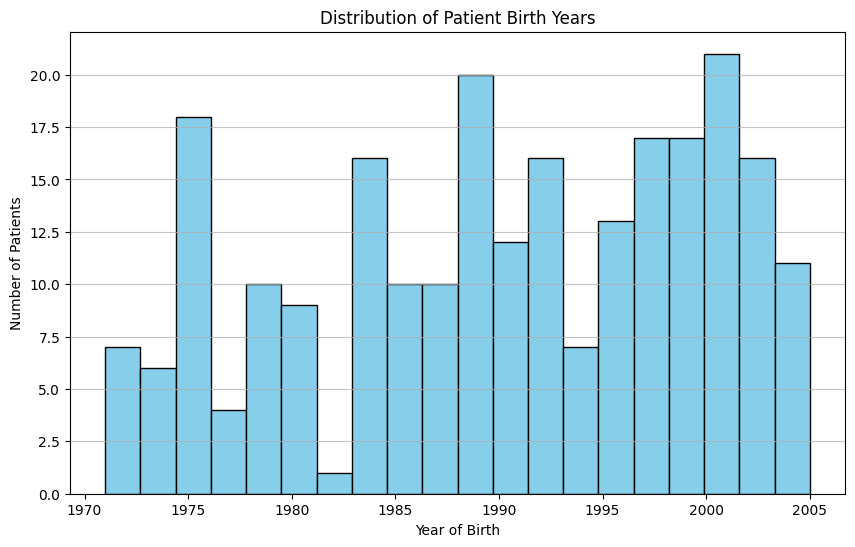

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data['DateOfBirth'].dt.year, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Year of Birth')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patient Birth Years')
plt.grid(axis='y', alpha=0.75)
plt.show()

The data distribution of Year of Birth start from 1972 to 2005. Because the data collect in 2023, we know that all of patient are an adult (17+)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

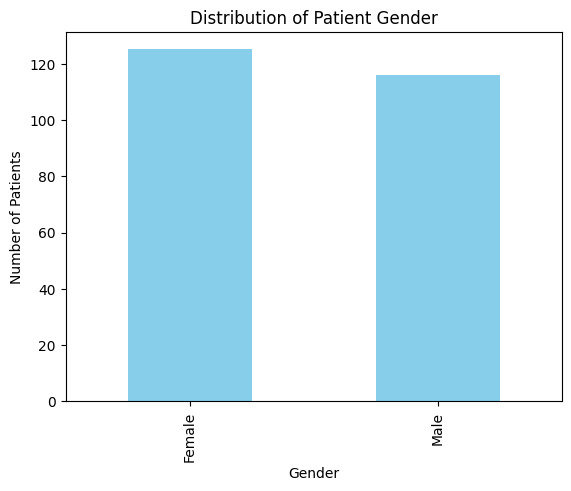

In [17]:
data['Gender'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patient Gender')
plt

The distribution of gender relatively same for male and famale

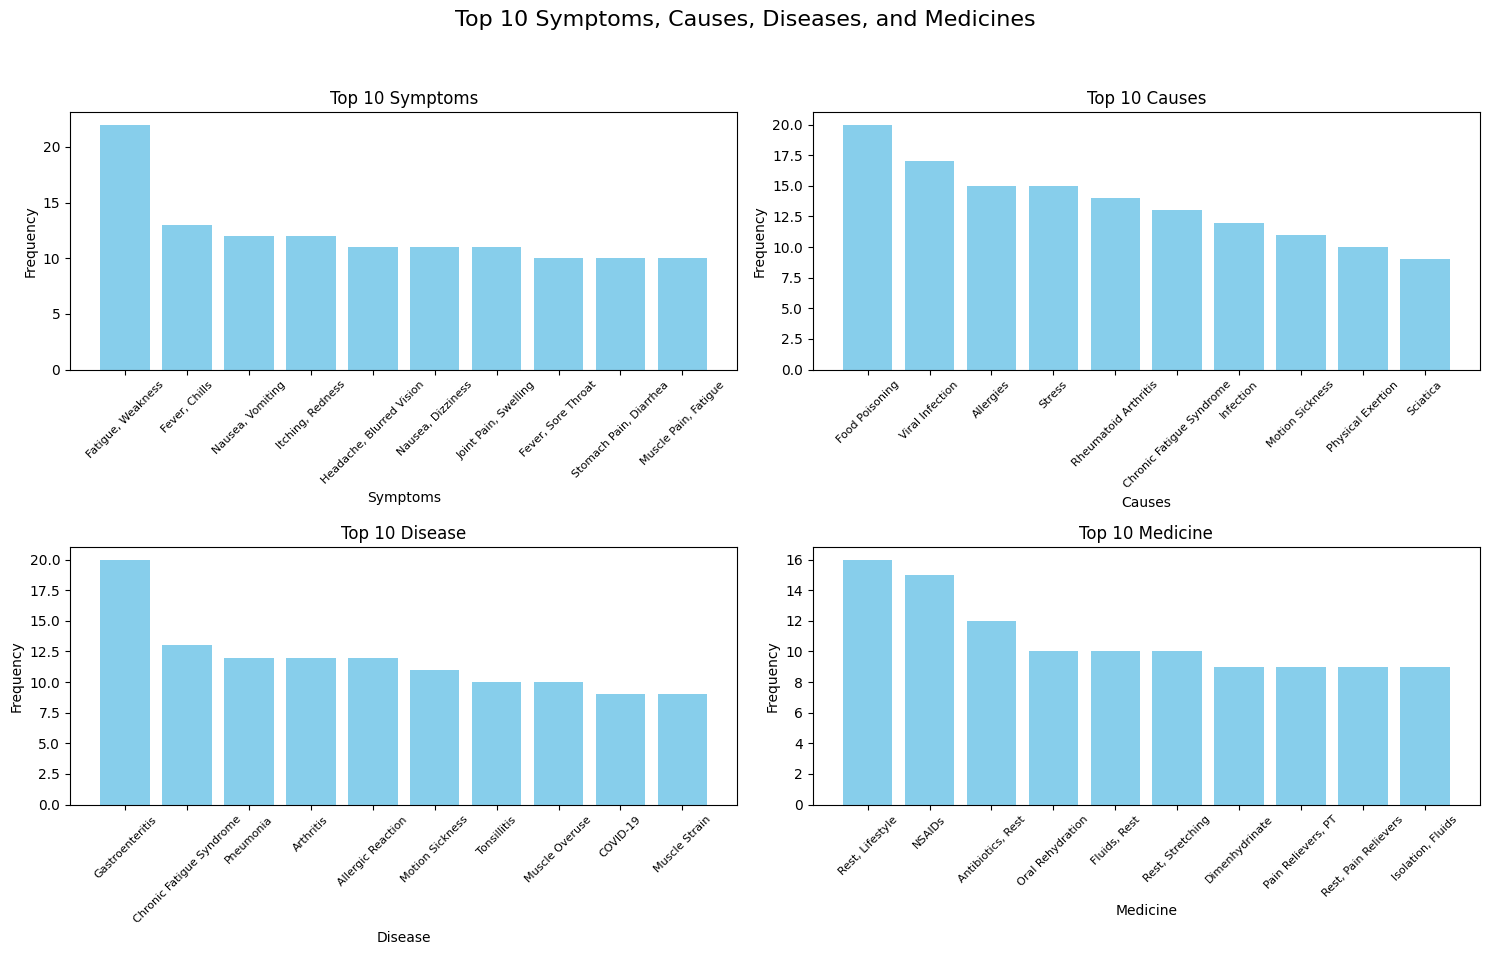

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Top 10 Symptoms, Causes, Diseases, and Medicines", fontsize=16)
features = ['Symptoms', 'Causes', 'Disease', 'Medicine']

for i, feature in enumerate(features):
  row = i // 2
  col = i % 2

  value_counts = data[feature].value_counts().nlargest(10)
  axes[row, col].bar(value_counts.index, value_counts.values, color='skyblue')
  axes[row, col].set_title(f'Top 10 {feature}')
  axes[row, col].set_xlabel(feature)
  axes[row, col].set_ylabel('Frequency')
  axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Display the top 10 of each column. We can know that some symptoms, causes, disease and madicine show more than 10 times.

# Data Preprocessing

In [19]:
data['Gender'] = data['Gender'].str.lower()
data['Symptoms'] = data['Symptoms'].str.lower()
data['Causes'] = data['Causes'].str.lower()
data['Disease'] = data['Disease'].str.lower()
data['Medicine'] = data['Medicine'].str.lower()

Convert the data to lower case to make the model learn easyly

In [20]:
data['combined_features'] = data['Symptoms'] + ' ' + data['Causes'] + ' ' + data['Disease']
data['combined_features'] = data['combined_features'].apply(lambda x:x.replace(',',' '))

We combine the features so that we can used to the next procces when make the TF-IDF later. We also removed the unused character like comma.

In [21]:
data

,Name,DateOfBirth,Gender,Symptoms,Causes,Disease,Medicine,combined_features
0,John Doe,1980-05-15,male,"fever, cough",viral infection,common cold,"ibuprofen, rest",fever cough viral infection common cold
1,Jane Smith,1992-08-10,female,"headache, fatigue",stress,migraine,sumatriptan,headache fatigue stress migraine
2,Michael Lee,1975-02-20,male,shortness of breath,pollution,asthma,albuterol inhaler,shortness of breath pollution asthma
3,Emily Chen,1988-11-03,female,"nausea, vomiting",food poisoning,gastroenteritis,oral rehydration,nausea vomiting food poisoning gastroenteritis
4,Alex Wong,2001-06-12,male,sore throat,bacterial infection,strep throat,penicillin,sore throat bacterial infection strep throat
...,...,...,...,...,...,...,...,...
282,Ava Lim,1993-07-11,female,"cough, shortness of breath",covid-19 exposure,covid-19,"isolation, fluids",cough shortness of breath covid-19 exposure ...
283,Liam Goh,1987-09-16,male,"itching, redness",allergies,allergic reaction,antihistamine,itching redness allergies allergic...
284,Sophie Tan,1975-02-18,female,"muscle pain, fatigue",overexertion,muscle strain,"rest, pain relievers",muscle pain fatigue overexertion musc...
285,Noah Lim,2005-05-21,male,"nausea, vomiting",food poisoning,muscle strain,rehydration,nausea vomiting food poisoning muscle strain


## TF-IDF Vectorizer

In [22]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

Make the TF-IDF matrix to represent the features as a numeric vector. Every word is given weight by term frequency and inverse document frequency

# Content based filtering

In [23]:
def create_medicine_recommender(data=data, tfidf_matrix=tfidf_matrix):
    try:
        medicine_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

        medicine_similarity_df = pd.DataFrame(
            medicine_similarity,
            index=data['Medicine'],
            columns=data['Medicine']
        )

        return medicine_similarity_df

    except Exception as e:
        print(f"Error when try to create medicine recommender: {str(e)}")
        return None, None

create a medicine recommender system using cosine similarity based on the TF-IDF matrix of the combined features (symptoms, causes, and disease) of the medical data. This function return medicine similarity as dataframe to used to the next step when match the madicine

In [24]:
def get_medicine_recommendations(medicine_name, similarity_df, n_recommendations=3):
    try:
        similarity_df = similarity_df.reset_index().set_index('Medicine')

        if medicine_name not in similarity_df.index:
            return f"Medicine '{medicine_name}' not found in database"

        similar_scores = similarity_df[similarity_df.index == medicine_name]
        similar_scores = similar_scores.iloc[0]

        similar_medicines = similar_scores.sort_values(ascending=False)

        similar_medicines = similar_medicines.drop_duplicates().head(n_recommendations)

        return similar_medicines

    except Exception as e:
        return f"Error when try to get recommendation: {str(e)}"

in this function we get the madicine recommedation based on the similarity of the madicine that we input with the other madicine by the similarity df that we build from previous function. It's return top-n recommedation that is 3 by default

In [25]:
def get_recommendations_by_symptoms(symptoms, df=data):

    similarity_df = create_medicine_recommender()

    matching_rows = df[df['Symptoms'].str.contains(symptoms, case=False)]

    if matching_rows.empty:
        return "No matching symptoms found"

    reference_medicine = matching_rows.iloc[0]['Medicine']

    try:
        recommendations = get_medicine_recommendations(reference_medicine, similarity_df)
        return recommendations
    except KeyError:
        return f"Medicine '{reference_medicine}' not found in the similarity matrix."

this function is used to get the medicine by the symptoms. First, we find the madicine that have used for this symptom. After that we use madicine recommedation funtion berfore to get the madicine recommedation based on the madicine reference.

In [26]:
recommendations = get_recommendations_by_symptoms('fatigue')
print(recommendations)

Medicine
sumatriptan           1.000000
beta-blockers         0.631797
relaxation, nsaids    0.261742
Name: sumatriptan, dtype: float64


The code run seccesfully and can shoe the top 3 recommendation.

# Evaluation

In [27]:
def evaluate_recommendation_system(test_data, similarity_df, k=3):
    recall_scores = []
    reciprocal_ranks = []

    for _, row in test_data.iterrows():
        query_symptoms = row['Symptoms']
        true_medicine = row['Medicine']

        recommendations = get_recommendations_by_symptoms(query_symptoms, df=data)

        if isinstance(recommendations, pd.Series):
            recommended_medicines = recommendations.index[:k]
        else:
            continue

        # Recall@k
        recall = len(set(recommended_medicines) & {true_medicine}) / 1  # Since true_medicine is single
        recall_scores.append(recall)

        # Mean Reciprocal Rank
        if true_medicine in recommended_medicines:
            rank = list(recommended_medicines).index(true_medicine) + 1
            reciprocal_ranks.append(1 / rank)
        else:
            reciprocal_ranks.append(0)

    avg_recall = np.mean(recall_scores)
    mrr = np.mean(reciprocal_ranks)

    return {
        "Recall@k": avg_recall.round(2),
        "MRR": mrr.round(2)
    }

this function evaluates the performance of a medicine recommendation system using Recall@k and Mean Reciprocal Rank (MRR). It iterates through test data, gets recommendations for symptoms, and compares them to the true medicine. By calculating the average recall and reciprocal rank, it provides metrics to assess the accuracy and ranking quality of the recommendations.

In [28]:
test_data = data.sample(15, random_state=28)
similarity_df = create_medicine_recommender()

results = evaluate_recommendation_system(test_data, similarity_df)
print("Evaluation Results:", results)

Evaluation Results: {'Recall@k': 0.87, 'MRR': 0.73}


we make the test data by randomly take the sample af the data and evaluate using previuos function. As the result we get Evaluation Results:

**Recall@k: 0.87**

**MRR: 0.73**